In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# user defined functions

#1) to strip M for millions and K for thousands and convert to whole number

def suffix_converter(x):
    
    if type(x) == str:
        if x[len(x)-1] == 'M':
            x = x.strip('M')
            return float(x)*(10**6)
            
        elif x[len(x)-1] == 'K':
            x = x.strip('K')
            return float(x)*(10**3)  
            
        elif x[-3:] == 'lbs':
            x = x.strip('lbs')
            return float(x)
        
        else:
            return float(x)
    else:
        return x

#-------------------------------------------------------------    
#2) to convert height to inches

def height_converter(x):
    
    if x != 0 and type(x) == str:
        ht = x.split("'")
        feet = float(ht[0])
        inch = float(ht[1])
        height = feet*12 + inch
        return height
    elif x == 0 or type(x) != str:
        return x

#-------------------------------------------------------------
#3) to extract year from a full date

def year_ext(x):
    
    if type(x) == str:
        return int(x[-4:])
    else:
        return x
    
#-------------------------------------------------------------
#4) to convert into date time data type

def datetime_converter(x):
    
    if type(x) == str:
        if len(x)>4:
            y = datetime.datetime.strptime(x, "%b %d, %Y")
            return(y)
        if len(x)==4:
            y = datetime.datetime.strptime(x, "%Y")
            return(y)
    else:
        return x
    

In [3]:
#loading the csv into pandas data frame 

fifa_data = pd.read_csv('fifa.csv')

In [4]:
# view all columns to see which are unwanted for our data

fifa_data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [5]:
# remove unwanted columns

unwanted_cols = ['Club','Photo', 'Nationality', 'Flag',
       'Potential', 'Club Logo', 'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type','Jersey Number', 'Loaned From', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
fifa_data.drop(unwanted_cols,axis=1,inplace = True)

In [6]:
fifa_data

,ID,Name,Age,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,€110.5M,€565K,5.0,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,94,€77M,€405K,5.0,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,92,€118.5M,€290K,5.0,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,193080,De Gea,27,91,€72M,€260K,4.0,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,91,€102M,€355K,4.0,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,€60K,€1K,1.0,CM,"May 3, 2017",2019,5'9,134lbs,€143K
18203,243165,N. Christoffersson,19,47,€60K,€1K,1.0,ST,"Mar 19, 2018",2020,6'3,170lbs,€113K
18204,241638,B. Worman,16,47,€60K,€1K,1.0,ST,"Jul 1, 2017",2021,5'8,148lbs,€165K
18205,246268,D. Walker-Rice,17,47,€60K,€1K,1.0,RW,"Apr 24, 2018",2019,5'10,154lbs,€143K


In [7]:
# stripping '€' symbol from values,wage and release clause columns

# converting 'M' and 'K' to millions and thousands in numbers from values,wage and release clause columns 

# stripping 'lbs from Weight columns'

strip_cols = ['Value','Wage','Release Clause','Weight']

for i in strip_cols:
    fifa_data[i] = fifa_data[i].str.strip('€')
    temp = []
    for j in fifa_data[i]:
        temp.append(suffix_converter(j))
    else:
        fifa_data[i] = temp

In [8]:
# height conversion

temp = []
for i in fifa_data['Height']:
    temp.append(height_converter(i))
else:
    fifa_data['Height'] = temp

In [9]:
# joined date converted to years with data type as float

temp = []
for j in fifa_data['Joined']:
    temp.append(year_ext(j))    
else:
    fifa_data['Joined'] = temp

In [10]:
# Contract valid till date converted to date time format

fifa_data['Contract Valid Until'].fillna("2020", inplace=True)

temp = []
for j in fifa_data['Contract Valid Until']:
    temp.append(datetime_converter(j))    
else:
    fifa_data['Contract Valid Until'] = temp

In [11]:
fifa_data

,ID,Name,Age,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,110500000.0,565000.0,5.0,RF,2004.0,2021-01-01,67.0,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,77000000.0,405000.0,5.0,ST,2018.0,2022-01-01,74.0,183.0,127100000.0
2,190871,Neymar Jr,26,92,118500000.0,290000.0,5.0,LW,2017.0,2022-01-01,69.0,150.0,228100000.0
3,193080,De Gea,27,91,72000000.0,260000.0,4.0,GK,2011.0,2020-01-01,76.0,168.0,138600000.0
4,192985,K. De Bruyne,27,91,102000000.0,355000.0,4.0,RCM,2015.0,2023-01-01,71.0,154.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,60000.0,1000.0,1.0,CM,2017.0,2019-01-01,69.0,134.0,143000.0
18203,243165,N. Christoffersson,19,47,60000.0,1000.0,1.0,ST,2018.0,2020-01-01,75.0,170.0,113000.0
18204,241638,B. Worman,16,47,60000.0,1000.0,1.0,ST,2017.0,2021-01-01,68.0,148.0,165000.0
18205,246268,D. Walker-Rice,17,47,60000.0,1000.0,1.0,RW,2018.0,2019-01-01,70.0,154.0,143000.0


-------------

In [12]:
fifa_data.isnull().sum()

ID                             0
Name                           0
Age                            0
Overall                        0
Value                          0
Wage                           0
International Reputation      48
Position                      60
Joined                      1553
Contract Valid Until           0
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [13]:
# it is not recommended to do mean imputation for position column,
# so we are removing the rows where we have null value for position

# by removing those we are only removing 0.3% of data which is within the permissible limit
# this in turn helps us to avoid using mean imutation for multiples columns like,
# International Reputation, Height and Weight

fifa_data.dropna(subset = ['Position'],axis=0,inplace=True)
fifa_data.isnull().sum()

ID                             0
Name                           0
Age                            0
Overall                        0
Value                          0
Wage                           0
International Reputation       0
Position                       0
Joined                      1493
Contract Valid Until           0
Height                         0
Weight                         0
Release Clause              1504
dtype: int64

In [14]:
# we are doing mean imputation, where the Nan values are replaced with column mean values

fifa_data.fillna(fifa_data.mean(), inplace=True)
fifa_data.isnull().sum()


ID                          0
Name                        0
Age                         0
Overall                     0
Value                       0
Wage                        0
International Reputation    0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [16]:
# converting all years from float to int data type for Joined column

fifa_data['Joined'] = fifa_data['Joined'].astype(int)


-------------

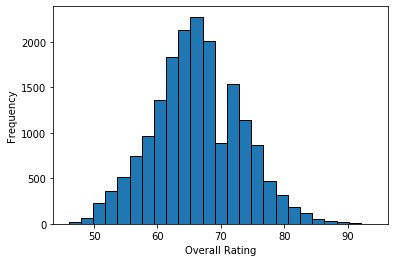

In [17]:
#the distribution of Overall rating for all players

plt.hist(data = fifa_data, x = 'Overall', bins = 25, edgecolor = 'black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.savefig('overall rating distribution.png',dpi = 200)
plt.show()

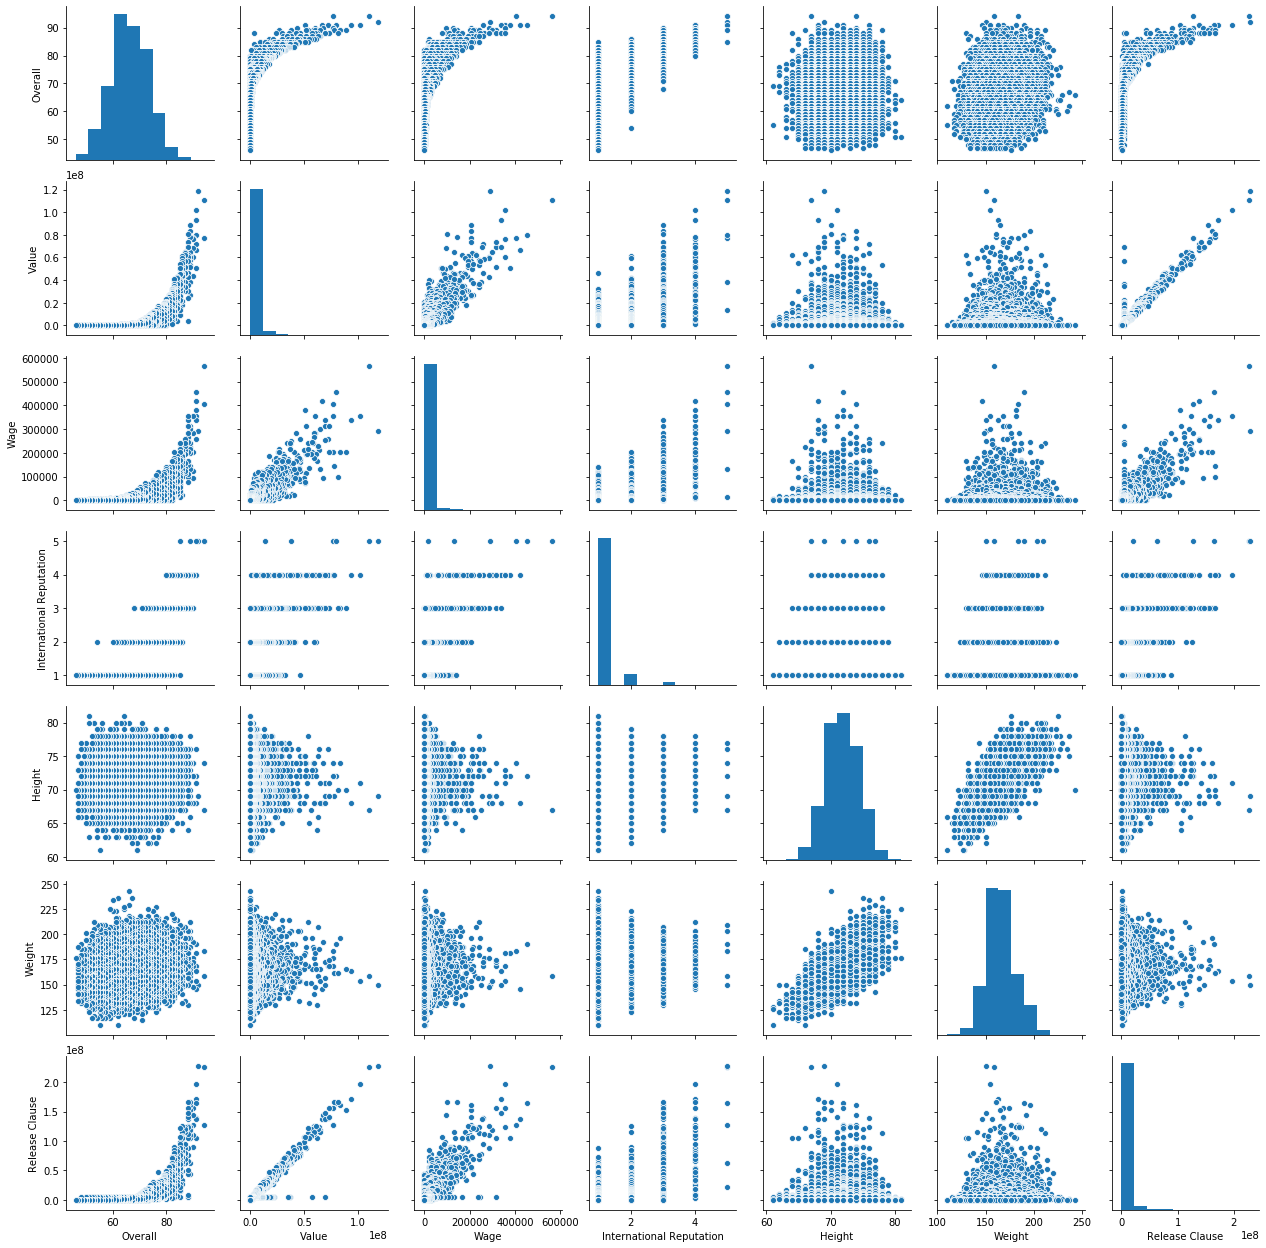

In [18]:
#pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

sns.pairplot(fifa_data, vars =['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])
plt.savefig('Pair Plot.png',dpi = 200)
plt.show()

In [19]:
# table containing the top 20 players ranked by Overall score and whose contract expires in 2020
top_20 = fifa_data[fifa_data['Contract Valid Until']==2020].sort_values(by='Overall',ascending=0)[0:20]
top_20.to_csv('Top_20_Contract_2020.csv')
top_20

,ID,Name,Age,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause


In [20]:
print('For Top 20 with Contract valid until 2020 : \n- Average Wage :'
      ,top_20['Wage'].mean(),'Euros','\n- Average Age :',top_20['Age'].mean()
      ,'Years','\n- Correlation between Overall rating and Value of a player :'
      , top_20['Overall'].corr(top_20['Value']))

For Top 20 with Contract valid until 2020 : 
- Average Wage : nan Euros 
- Average Age : nan Years 
- Correlation between Overall rating and Value of a player : nan


In [21]:
top_5_each_position = pd.DataFrame(columns=None)
for i in fifa_data.Position.unique():
    temp = fifa_data[fifa_data['Position']==i].sort_values(by='Overall',ascending=0)[0:5]
    top_5_each_position = pd.concat([top_5_each_position,temp],axis=0)
top_5_each_position.to_csv('top_5_each_position.csv')
top_5_each_position

,ID,Name,Age,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,110500000.0,565000.0,5.0,RF,2004,2021-01-01,67.0,159.0,2.265000e+08
50,175943,D. Mertens,31,87,45000000.0,135000.0,3.0,RF,2013,2020-01-01,67.0,134.0,7.650000e+07
528,172114,D. Valeri,32,80,11500000.0,12000.0,2.0,RF,2013,2018-01-01,70.0,165.0,1.730000e+07
890,150516,L. Podolski,33,78,6500000.0,11000.0,3.0,RF,2017,2019-01-01,72.0,183.0,8.100000e+06
1774,201313,C. Ciano,28,75,6500000.0,17000.0,1.0,RF,2017,2021-01-01,69.0,161.0,1.170000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,200536,N. Schulz,25,80,14500000.0,37000.0,1.0,LWB,2017,2020-01-01,71.0,172.0,2.570000e+07
605,208334,J. Hector,28,79,10000000.0,26000.0,3.0,LWB,2012,2023-01-01,73.0,165.0,1.500000e+07
581,223682,Granell,29,79,12000000.0,37000.0,1.0,LWB,2014,2021-01-01,69.0,154.0,2.520000e+07
601,210455,Jonny,24,79,13500000.0,43000.0,2.0,LWB,2016,2019-06-30,67.0,154.0,4.585061e+06


In [22]:
# "NO" players appearing in more than one Table.

top_5_each_position[top_5_each_position.duplicated(['Name'])]['Name'].count()

0

In [23]:
# average wage one can expect to pay for the top 5 in every position

top_5_each_position_avg_wage = top_5_each_position.groupby(['Position'])['Wage'].mean()
top_5_each_position_avg_wage.to_csv('top_5_each_position_avg_wage.csv')
top_5_each_position_avg_wage

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

In [24]:
fifa_data

,ID,Name,Age,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,110500000.0,565000.0,5.0,RF,2004,2021-01-01,67.0,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,77000000.0,405000.0,5.0,ST,2018,2022-01-01,74.0,183.0,127100000.0
2,190871,Neymar Jr,26,92,118500000.0,290000.0,5.0,LW,2017,2022-01-01,69.0,150.0,228100000.0
3,193080,De Gea,27,91,72000000.0,260000.0,4.0,GK,2011,2020-01-01,76.0,168.0,138600000.0
4,192985,K. De Bruyne,27,91,102000000.0,355000.0,4.0,RCM,2015,2023-01-01,71.0,154.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,60000.0,1000.0,1.0,CM,2017,2019-01-01,69.0,134.0,143000.0
18203,243165,N. Christoffersson,19,47,60000.0,1000.0,1.0,ST,2018,2020-01-01,75.0,170.0,113000.0
18204,241638,B. Worman,16,47,60000.0,1000.0,1.0,ST,2017,2021-01-01,68.0,148.0,165000.0
18205,246268,D. Walker-Rice,17,47,60000.0,1000.0,1.0,RW,2018,2019-01-01,70.0,154.0,143000.0
